<a href="https://colab.research.google.com/github/Joaosantos3/Data-Science/blob/main/Carteira_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTAÇÃO DE BBT

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import yfinance as yahooFinance

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'axes.edgecolor']:
    plt.rcParams[param] = '1.0'
for param in ['ytick.color','xtick.color']:
    plt.rcParams[param] = 'white'

plt.rcParams['grid.color']='#2A3459'

# ESCOLHA DE CARTEIRA, DATA

In [2]:
start_date=input("Data:")

Data:2023-01-01


In [3]:
from datetime import datetime
end=datetime.now().strftime('%Y-%m-%d')
print(start_date)
print(end)
days = np.busday_count(start_date, end)
print(days)

2023-01-01
2024-08-12
420


In [4]:
carteira=['RAIZ4.SA','ABEV3.SA','ITSA4.SA','WEGE3.SA','PETR4.SA','SUZB3.SA']#'^BVSP']

In [5]:
d = {name: pd.DataFrame() for name in carteira}

In [6]:
for df_name in list(d.keys()):
  d[df_name]=yahooFinance.Ticker(df_name).history(start=start_date,end=end)

bovespa=yahooFinance.Ticker('^BVSP').history(start=start_date,end=end)

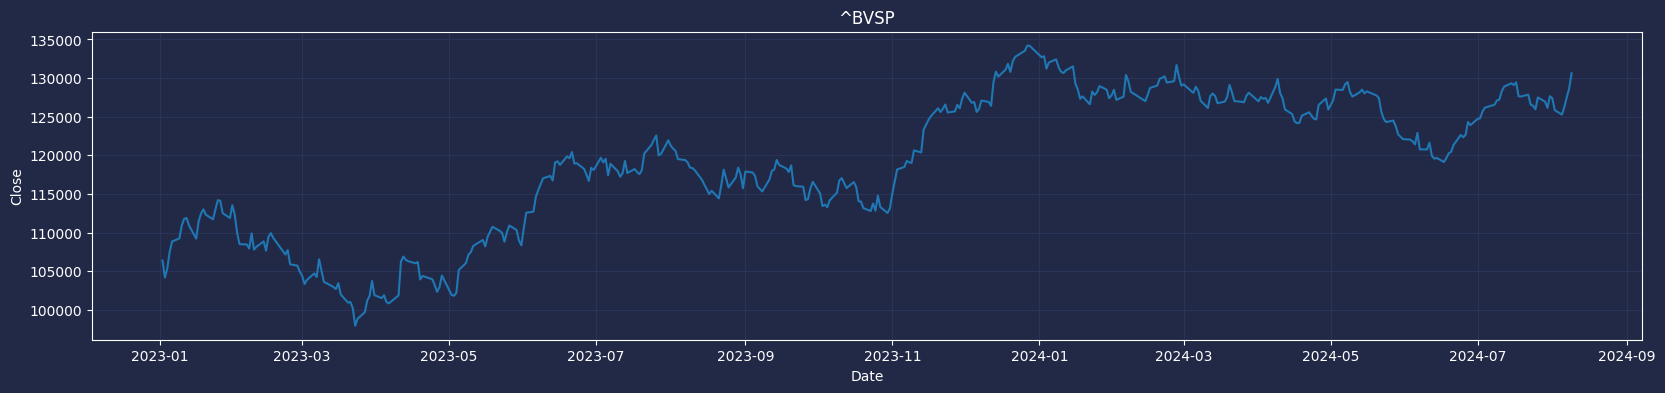

In [7]:
name='^BVSP'

fig1,ax1=plt.subplots(figsize=(20,4))
ax1=sns.lineplot(bovespa,y='Close',x=bovespa.index)
ax1.set_title(name)
plt.grid()

In [8]:
#NORMALIZANDO PARA 100
for df_name in list(d.keys()):
  d[df_name]['Close']=d[df_name]['Close']/d[df_name]['Close'].iloc[0]

bovespa['Close']=bovespa['Close']/bovespa['Close'].iloc[0]

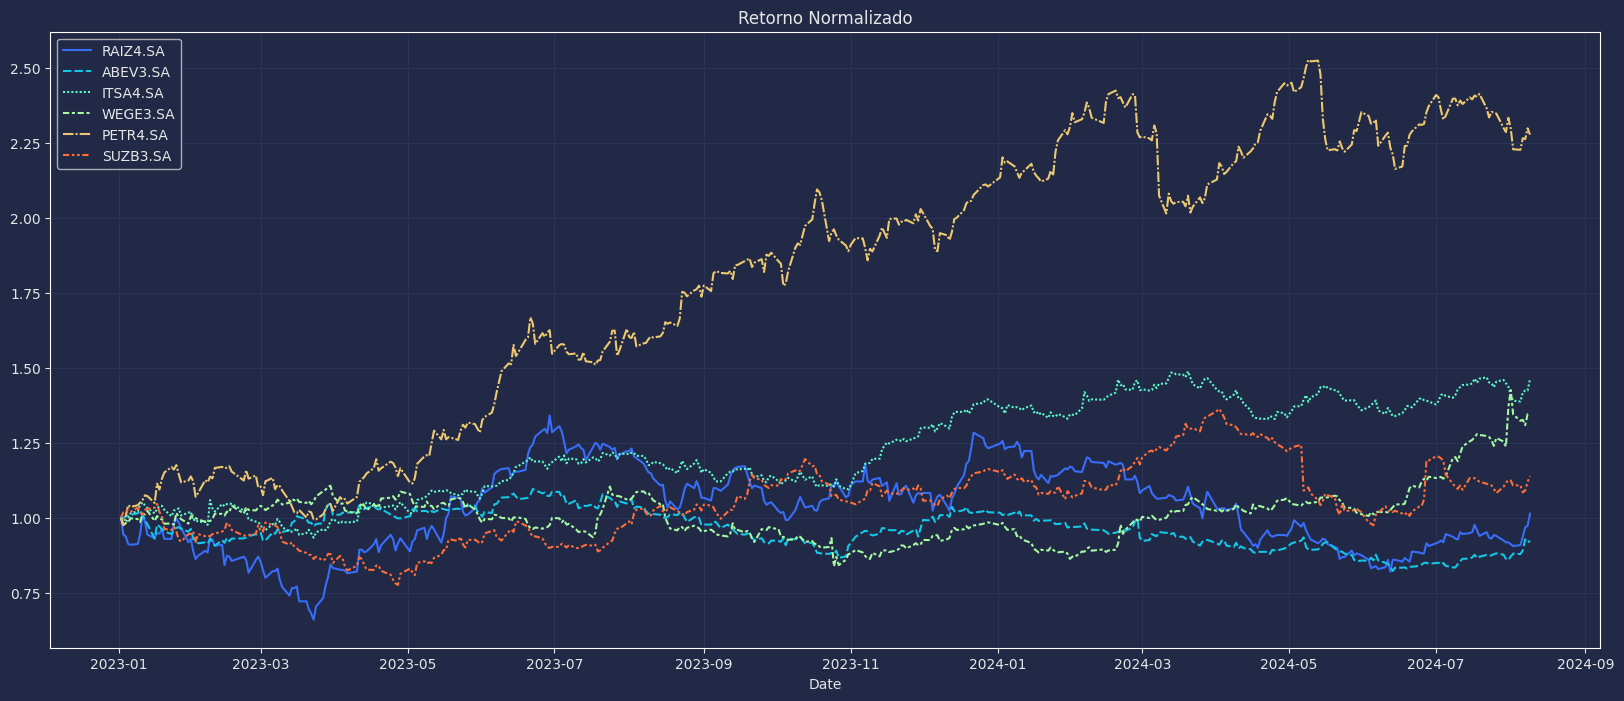

In [9]:
data_portifolio=pd.DataFrame()
for df_name in list(d.keys()):
  data_portifolio[df_name]=d[df_name]['Close']

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'

fig2,ax2=plt.subplots(1,1,figsize=(20,8))
sns.lineplot(data=data_portifolio,palette='rainbow',ax=ax2)
plt.title('Retorno Normalizado')
plt.grid()

#### Aqui, é possível identificar fatores de sazonalidade, tendência e informações do resíduo. O importante aqui é identificar "period" e identificar que a decomposição foi bem sucedida, isto é, os resíduos devem ser:
- Aleatórios: Sem padrões ou estruturas discerníveis.

- Média Zero: Próximos de zero, indicando que a tendência e a sazonalidade - foram removidas.

- Distribuição Normal: Simétricos, com um histograma próximo da distribuição normal.

- Sem Autocorrelação: Devem ser independentes, sem autocorrelação significativa.

- Variância Constante: Devem apresentar homocedasticidade, ou seja, variância constante ao longo do tempo.

**POR MAIS QUE OS GRÁFICOS SÃO FEITOS PARA TODAS AS EMPRESAS PARA OS MESMOS PARÂMETROS, CADA EMPRESA PODE DESEMPENHAR RESULTADOS DIFERENTES, NECESSITANDO DE PARÂMETROS DIFERENTES!**

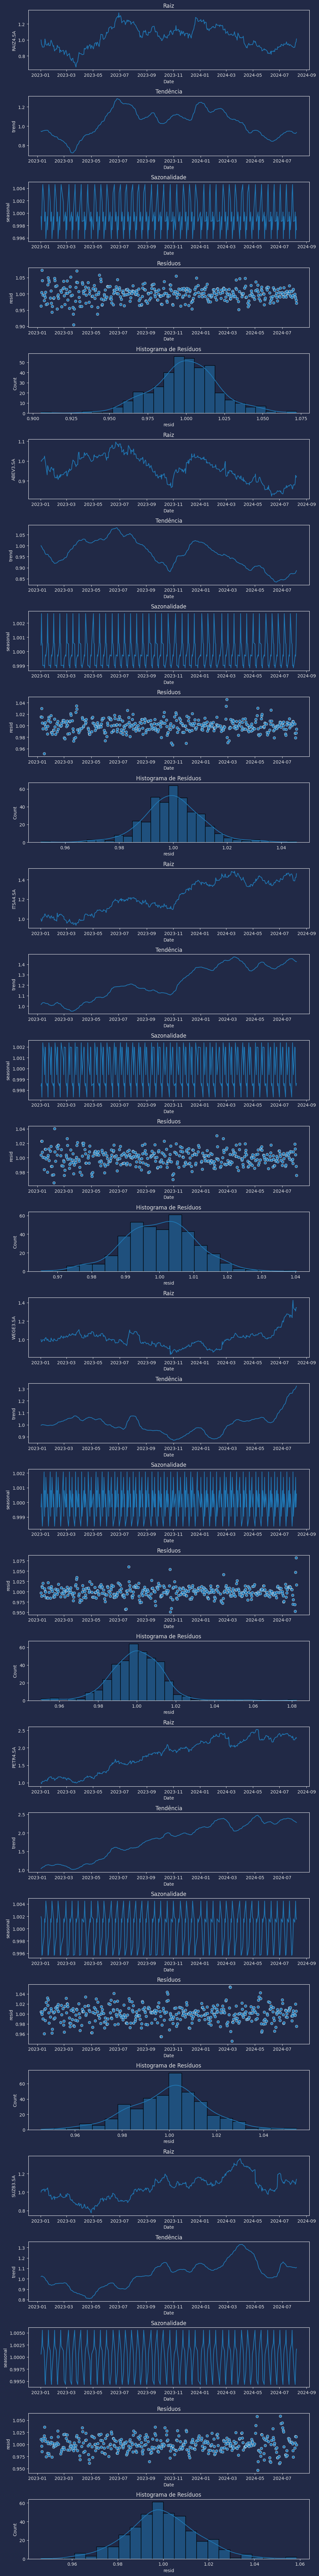

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
data_portifolio.index =pd.to_datetime(data_portifolio.index)

fig_,axs_=plt.subplots(int(4*data_portifolio.shape[1]+data_portifolio.shape[1]),1,figsize=(10,80))
cont=0

for col_index in range(0,data_portifolio.shape[1]):

  series=data_portifolio.iloc[:,col_index]
  result = seasonal_decompose(series, model='multiplicative',period=10)
  sns.lineplot(data=result.observed,ax=axs_[cont])
  axs_[cont].set_title('Raiz')
  cont+=1
  sns.lineplot(data=result.trend,ax=axs_[cont])
  axs_[cont].set_title('Tendência')
  cont+=1
  sns.lineplot(data=result.seasonal,ax=axs_[cont])
  axs_[cont].set_title('Sazonalidade')
  cont+=1
  sns.scatterplot(data=result.resid,ax=axs_[cont])
  axs_[cont].set_title('Resíduos')
  cont+=1
  sns.histplot(data=result.resid,ax=axs_[cont],kde=True)
  axs_[cont].set_title('Histograma de Resíduos')
  cont+=1



plt.subplots_adjust(hspace = 0.8)
plt.tight_layout()

In [11]:
data_raiz={name:pd.DataFrame() for name in carteira}

for df_name in list(d.keys()):
  data_raiz[df_name]=yahooFinance.Ticker(df_name).history(start=start_date,end=end)
  data_raiz[df_name]['Simple Return']=(data_raiz[df_name]['Close']/data_raiz[df_name]['Close'].shift(1))-1


data_zero={name:pd.DataFrame() for name in carteira}
data_acoes=pd.DataFrame()
for df_name in list(d.keys()):
  data_zero[df_name]=yahooFinance.Ticker(df_name).history(start=start_date,end=end)
  data_acoes[df_name]=data_zero[df_name]['Close']

In [12]:
return_portifolio=pd.DataFrame()
for df_name in list(d.keys()):
  return_portifolio[df_name]=data_raiz[df_name]['Simple Return']

### Retorno simples de cada ação

In [13]:
retornos_=return_portifolio.mean()*days*100
print("================RETORNO=================")
print(retornos_)
print("===============VOLATILIDADE=============")
print(return_portifolio.std())

retornos_[retornos_>0].index

================RETORNO=================
RAIZ4.SA    13.872988
ABEV3.SA    -5.116179
ITSA4.SA    43.071773
WEGE3.SA    36.524244
PETR4.SA    93.777590
SUZB3.SA    20.074916
dtype: float64
===============VOLATILIDADE=============
RAIZ4.SA    0.024420
ABEV3.SA    0.012444
ITSA4.SA    0.012528
WEGE3.SA    0.016117
PETR4.SA    0.018915
SUZB3.SA    0.017566
dtype: float64


Index(['RAIZ4.SA', 'ITSA4.SA', 'WEGE3.SA', 'PETR4.SA', 'SUZB3.SA'], dtype='object')

In [14]:
return_portifolio=return_portifolio[carteira[:-1]]
data_portifolio=data_portifolio[carteira[:-1]]

In [15]:
pesos=np.array([1/(return_portifolio.shape[1]-1)]*return_portifolio.shape[1])

In [16]:
pesos=np.array([1/return_portifolio.shape[1]]*return_portifolio.shape[1])

##Retornos (SIMPLES) percentuais

In [17]:
retornos_=return_portifolio.mean()*days*100
retornos_

,0
RAIZ4.SA,13.872988
ABEV3.SA,-5.116179
ITSA4.SA,43.071773
WEGE3.SA,36.524244
PETR4.SA,93.777590


In [18]:
"Retorno da carteira: " + str(round(np.dot(pesos,retornos_),3))+'%'

'Retorno da carteira: 36.426%'

### Correlação entre retornos
#### Fronteira de Markowitiz funciona melhor com ativos não correlacionados.



Text(0.5, 1.0, 'RETORNOS')

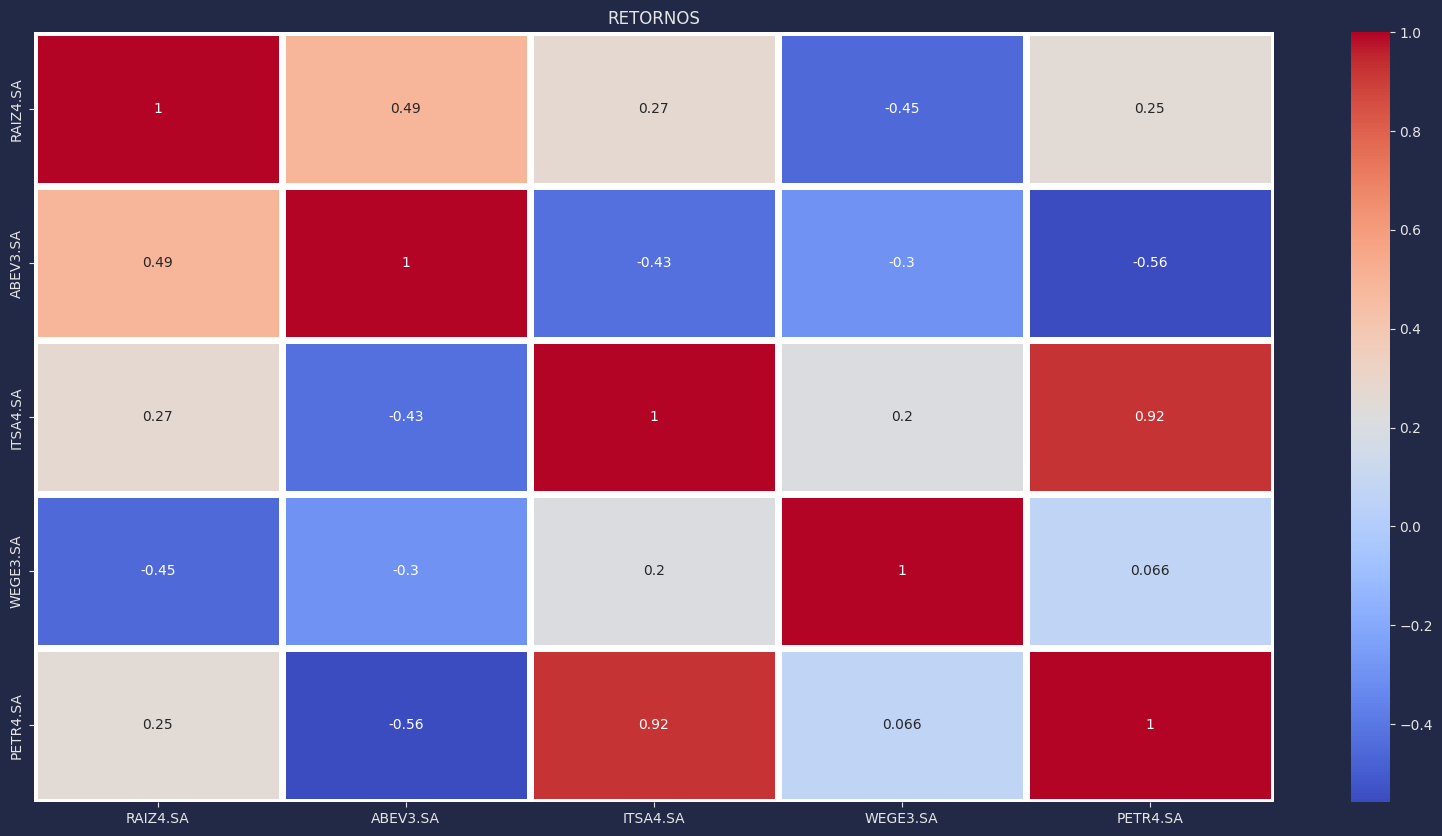

In [ ]:
data_portifolio.corr()
sns.set_palette("inferno")
fig,axis=plt.subplots(1,1,figsize=(20,10))
sns.heatmap(data=data_portifolio.corr(),annot=True,cmap="coolwarm",linecolor="white",linewidths=5,ax=axis)
axis.set_title("RETORNOS")


In [ ]:
#calculo de volatilidade da carteira
pesos=np.array([1/return_portifolio.shape[1]]*return_portifolio.shape[1])#0.4])
volat=np.dot(pesos.T,np.dot(data_portifolio.cov()*days,pesos))**0.5
volat

2.6795279240851664

In [ ]:
#volatilidade da bolsa
dados=bovespa['Close']
volatilidade_GSPC=dados.std()*np.sqrt(days)
volatilidade_GSPC

1.7223060724343708

### Fronteira de Markowitiz
#### Usaremos retorno logarítmo!

In [ ]:
#dados
data_acoes=data_acoes[carteira[:-1]]

In [ ]:
data_log_return=np.log(data_acoes/data_acoes.shift(1))
data_log_return

,RAIZ4.SA,ABEV3.SA,ITSA4.SA,WEGE3.SA,PETR4.SA
Date,,,,,
2023-01-02 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN
2023-01-03 00:00:00-03:00,-0.058156,-0.001410,-0.025440,-0.025251,-0.025631
2023-01-04 00:00:00-03:00,-0.006006,0.005630,0.008552,0.006707,0.031287
2023-01-05 00:00:00-03:00,-0.027482,0.002803,0.014493,0.002137,0.035375
2023-01-06 00:00:00-03:00,-0.003101,0.002097,0.016647,0.014568,-0.005880
...,...,...,...,...,...
2024-08-05 00:00:00-03:00,0.003400,-0.001686,-0.002035,-0.015686,-0.000840
2024-08-06 00:00:00-03:00,0.030052,0.013412,0.021159,0.002249,0.017218
2024-08-07 00:00:00-03:00,0.032365,0.040789,0.004973,-0.013362,-0.001378


##RETORNOS (LOG)

In [ ]:
data_log_return.mean()*days

,0
RAIZ4.SA,0.013920
ABEV3.SA,-0.083651
ITSA4.SA,0.397875
WEGE3.SA,0.311020
PETR4.SA,0.861649


,RAIZ4.SA,ABEV3.SA,ITSA4.SA,WEGE3.SA,PETR4.SA
RAIZ4.SA,1.000000,0.273353,0.431346,0.124778,0.223871
ABEV3.SA,0.273353,1.000000,0.451224,0.195292,0.073531
ITSA4.SA,0.431346,0.451224,1.000000,0.162114,0.217217
WEGE3.SA,0.124778,0.195292,0.162114,1.000000,0.064750
PETR4.SA,0.223871,0.073531,0.217217,0.064750,1.000000


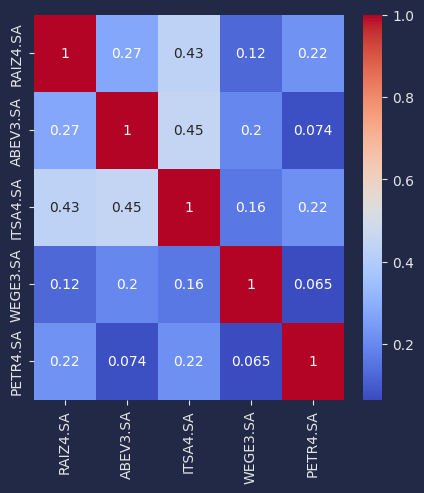

In [ ]:
fig,axs=plt.subplots(figsize=(5,5))
sns.heatmap(data_log_return.corr(),annot=True,cmap="coolwarm",linecolor="white")
data_log_return.corr()

In [ ]:
combinacoes_pesos=1000

weights_matrix=np.zeros((combinacoes_pesos,pesos.shape[0]))
for i in range(0,combinacoes_pesos):
  number_random=np.random.random(pesos.shape[0])
  number_random/=sum(number_random)
  weights_matrix[i][:]=number_random

##          **Portifolio return**


In [ ]:
print(data_log_return.mean())
means_=np.array(data_log_return[return_portifolio.columns.tolist()].mean())
means_

RAIZ4.SA    0.000033
ABEV3.SA   -0.000199
ITSA4.SA    0.000947
WEGE3.SA    0.000741
PETR4.SA    0.002052
dtype: float64


array([ 3.31432608e-05, -1.99170136e-04,  9.47322359e-04,  7.40523001e-04,
        2.05154572e-03])

In [ ]:
retornos_=np.dot(weights_matrix,means_)*days

##         **Portifolio Variance**

In [ ]:
variance=np.zeros((combinacoes_pesos,1))
for i in range(0, combinacoes_pesos):
  variance[i][:]=np.dot(weights_matrix[i][:],np.dot(data_log_return.cov()*days,\
                                      weights_matrix[i][:].T))

In [ ]:
#desvio padrao
volatilidade=np.sqrt(variance)

<ipython-input-32-8f458e7ee847>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['Volatilidade'],y=df['Retorno'], palette='inferno')


<Axes: xlabel='Volatilidade', ylabel='Retorno'>

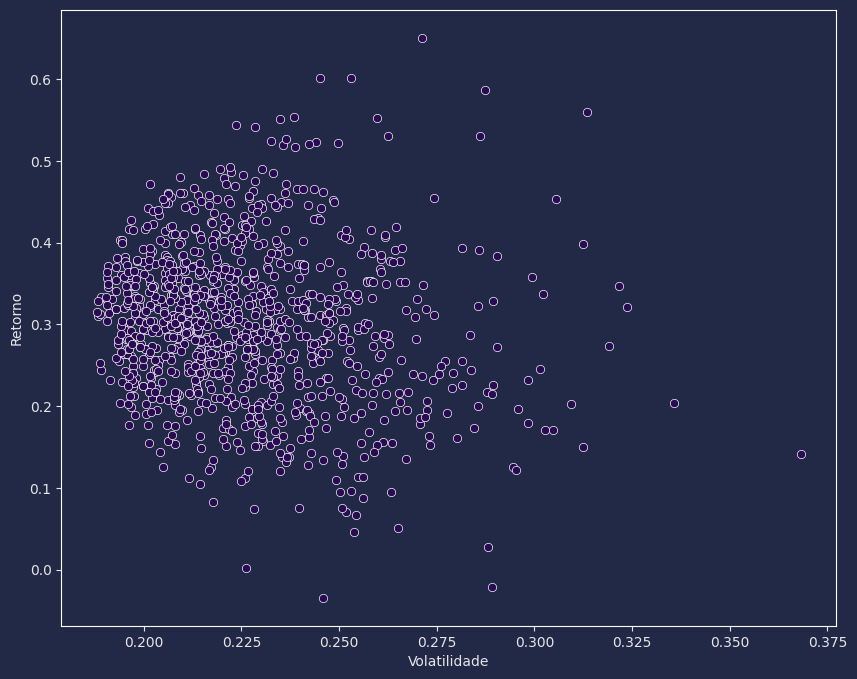

In [ ]:
df=pd.DataFrame()
df['Volatilidade']=volatilidade.reshape(1,-1)[0]
df['Retorno']=retornos_

#df.plot(x="Volatilidade",y='Retorno', kind="scatter",figsize=(10,6))
plt.subplots(figsize=(10,8))
plt.style.use("dark_background")
sns.scatterplot(x=df['Volatilidade'],y=df['Retorno'], palette='inferno')

In [ ]:
weights_matrix[[df[(df["Retorno"]>0.05)&(df['Volatilidade']<0.20)].index]].round(2)

array([[[0.12, 0.22, 0.28, 0.21, 0.17],
        [0.11, 0.24, 0.28, 0.23, 0.14],
        [0.08, 0.31, 0.13, 0.26, 0.22],
        [0.12, 0.27, 0.24, 0.25, 0.13],
        [0.01, 0.26, 0.21, 0.38, 0.13],
        [0.1 , 0.26, 0.28, 0.26, 0.11],
        [0.03, 0.24, 0.28, 0.17, 0.28],
        [0.11, 0.27, 0.25, 0.19, 0.18],
        [0.06, 0.25, 0.33, 0.19, 0.17],
        [0.1 , 0.28, 0.17, 0.28, 0.18],
        [0.09, 0.26, 0.16, 0.25, 0.25],
        [0.02, 0.18, 0.3 , 0.25, 0.26],
        [0.06, 0.12, 0.36, 0.32, 0.15],
        [0.07, 0.39, 0.2 , 0.21, 0.14],
        [0.12, 0.22, 0.26, 0.28, 0.12],
        [0.12, 0.24, 0.25, 0.19, 0.19],
        [0.01, 0.3 , 0.31, 0.15, 0.23],
        [0.06, 0.19, 0.35, 0.26, 0.13],
        [0.02, 0.18, 0.27, 0.35, 0.19],
        [0.08, 0.34, 0.34, 0.11, 0.14],
        [0.09, 0.29, 0.21, 0.28, 0.12],
        [0.09, 0.21, 0.32, 0.19, 0.2 ],
        [0.07, 0.31, 0.16, 0.37, 0.08],
        [0.02, 0.32, 0.42, 0.09, 0.15],
        [0.03, 0.25, 0.28, 0.21, 0.23],


In [ ]:
data_pesos=pd.concat([df,pd.DataFrame(weights_matrix, columns=carteira[:-1])],axis=1)

In [ ]:
import plotly.express as px

graph=px.scatter(data_pesos,x='Volatilidade',y='Retorno',hover_data=carteira[:-1],template = "plotly_dark",title='Fronteira de Markovitz')
graph.update_layout(plot_bgcolor='#212946',paper_bgcolor='#212946')

###DOWNLOAD MARKOWITZ ANALYSIS

In [ ]:
!pip install xlsxwriter

In [ ]:
data_pesos[(data_pesos['Volatilidade']<0.56)&(data_pesos['Retorno']>0.05)]

writer = pd.ExcelWriter('Fronteira_Markowitz_.xlsx', engine='xlsxwriter')
data_pesos[(data_pesos['Volatilidade']<0.56)&(data_pesos['Retorno']>0.05)].to_excel(writer,sheet_name='1',index=False)
writer.close()

from google.colab import files
files.download('Fronteira_Markowitz_.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>